In [9]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


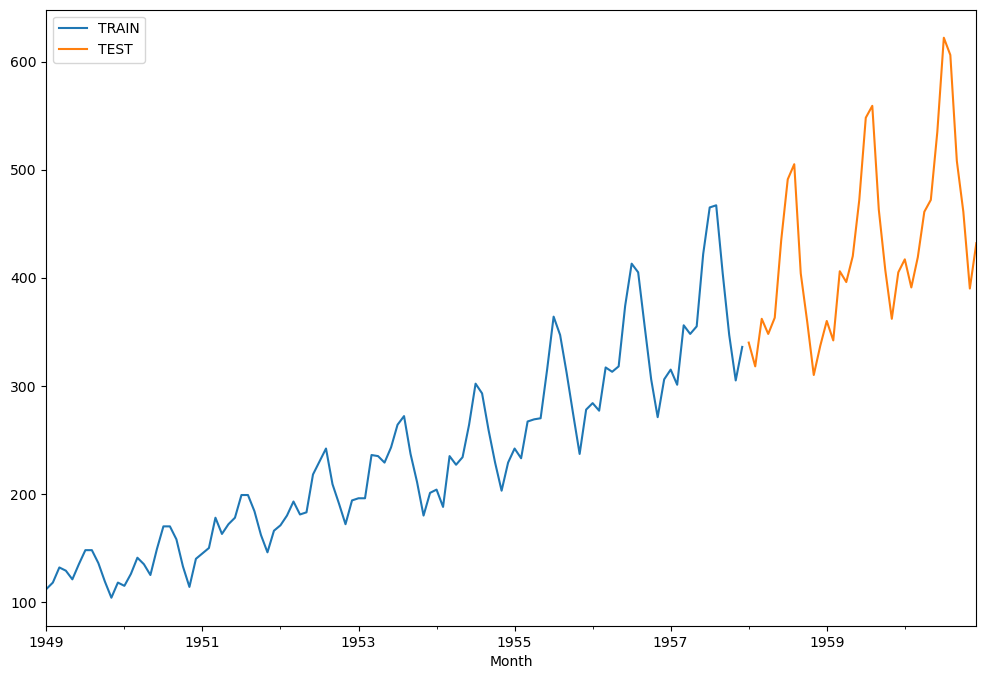

In [4]:
train_data = df.iloc[:108] # assume we have observed the first 75% data, 108 data points
test_data = df.iloc[108:] # consider 36-step forecast
train_data['#Passengers'].plot(legend=True, label='TRAIN')
test_data['#Passengers'].plot(legend=True, label='TEST', figsize=(12, 8));

## Task 1: Time Series Decomposition

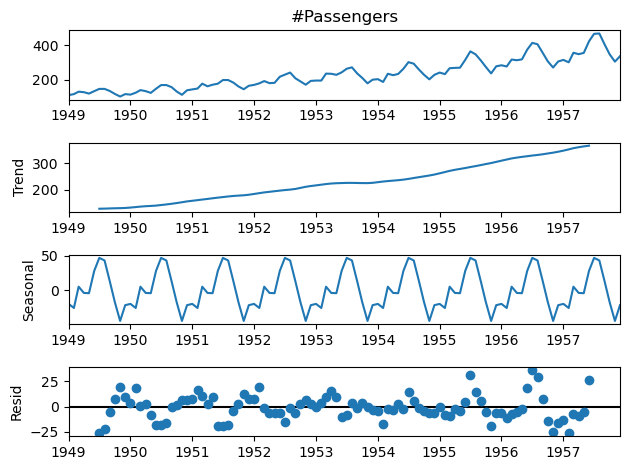

In [5]:
seasonal_decompose(train_data['#Passengers']).plot();

## Task 2 Single exponential smoothing

<AxesSubplot:title={'center':'SES with MSE 11731.968907671675'}, xlabel='Month'>

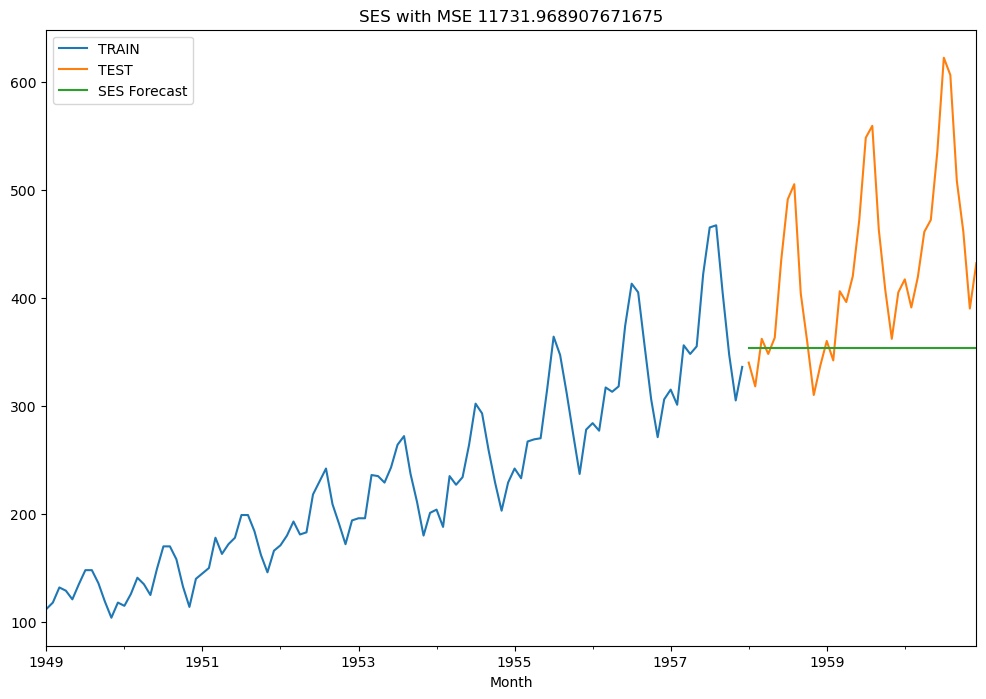

In [6]:
alpha = 0.1 # specify a value close to 1
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha, optimized=False)
test_predictions = model.forecast(36).rename('SES Forecast')
MSE = mean_squared_error(test_data['#Passengers'], test_predictions)
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='SES Forecast', title = 'SES with MSE ' + str(MSE))

## Task 3: Double Exponential Smoothing

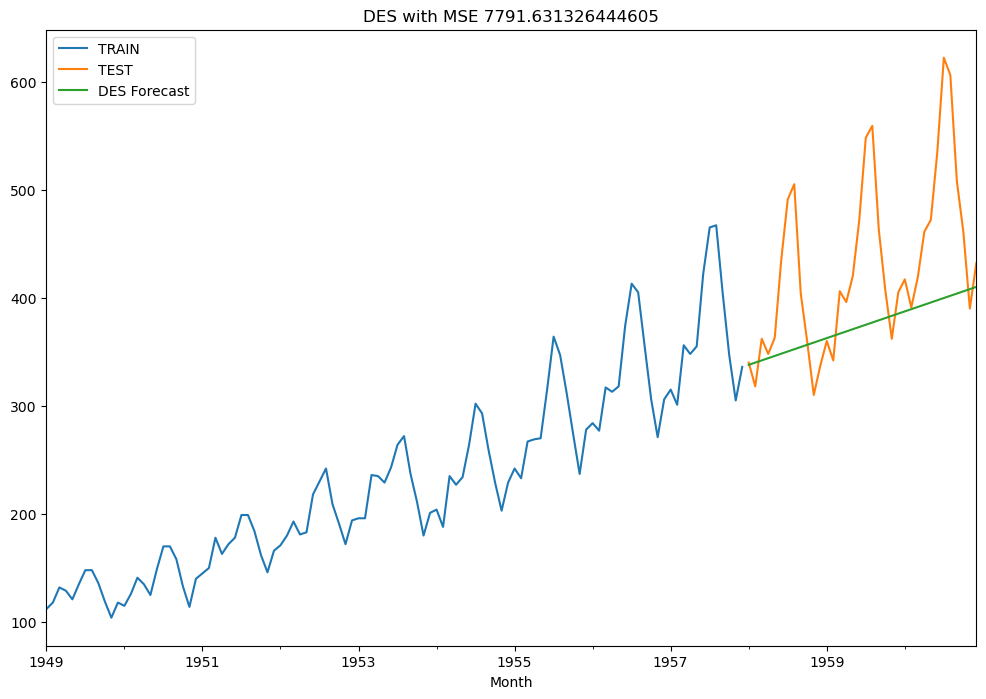

In [7]:
double_model = ExponentialSmoothing(train_data['#Passengers'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')
MSE = mean_squared_error(test_data['#Passengers'], test_predictions)
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='DES Forecast', title = 'DES with MSE ' + str(MSE));

## Task 4: Triple exponential 

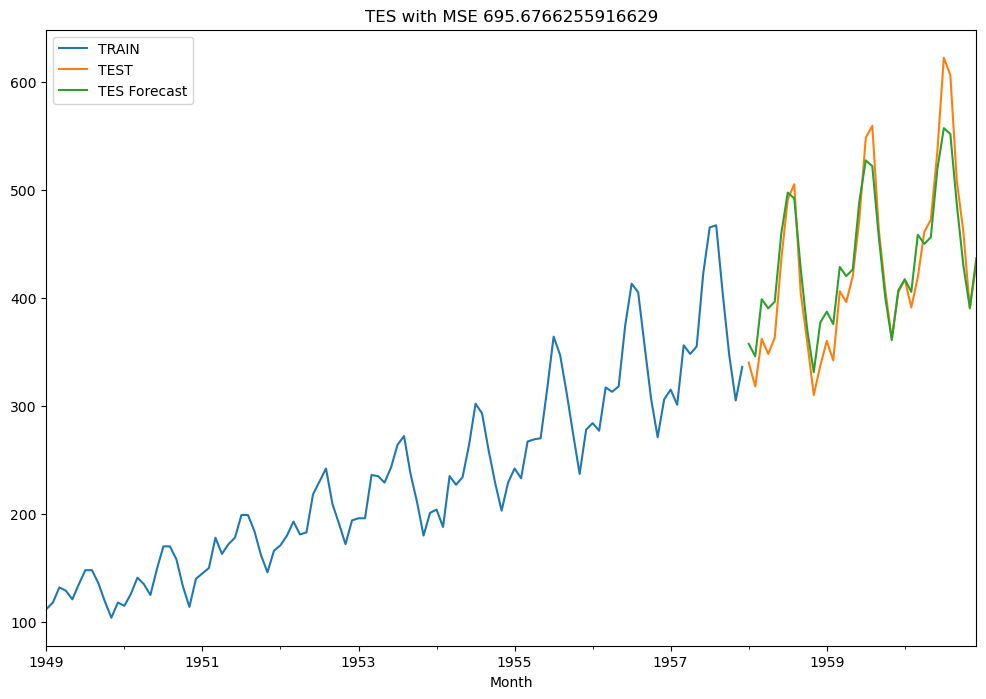

In [8]:
triple_model = ExponentialSmoothing(train_data['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(36).rename('TES Forecast')
MSE = mean_squared_error(test_data['#Passengers'], test_predictions)
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='TES Forecast', title = 'TES with MSE ' + str(MSE));